3. Data Cleansing and Transformation

Submit a pdf document and ipynb notebook which should contain following details:

Team member's details : Group Name (give a name to your group), Name, Email, Country, College/Company, Specialization ( Data Science, NLP, Data Analyst)

Problem description

Github Repo link

Data cleansing and transformation done on the data.

Try at least 2 techniques to clean the data ( for NA values : mean/median/mode/Model based approach to handle NA value/WOE and like this try different techniques to identify and handle outliers as well)

for NLP try different featurization technique and also clean the data using regex and python

Each member should code and review peers work. (Review comment should be present in the github repo)

Each team member should work on different data cleansing approach.

Note:

If one team member is using mean to impute values then other member should experiment on segmented approach or any other model based approach to impute the null values.

you are allowed to merge the code of each individual and work together to get good result.

Make sure code of each team member is placed at provided URL (single repository for whole team).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Bank-additional-full Dataset

In [2]:
# Load the data from the desired file
data1 = pd.read_csv('bank-additional-full.csv', sep=';')  # Replace with the desired file name

In [3]:
data1.shape

(41188, 21)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
NumericalCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
CategoricalCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

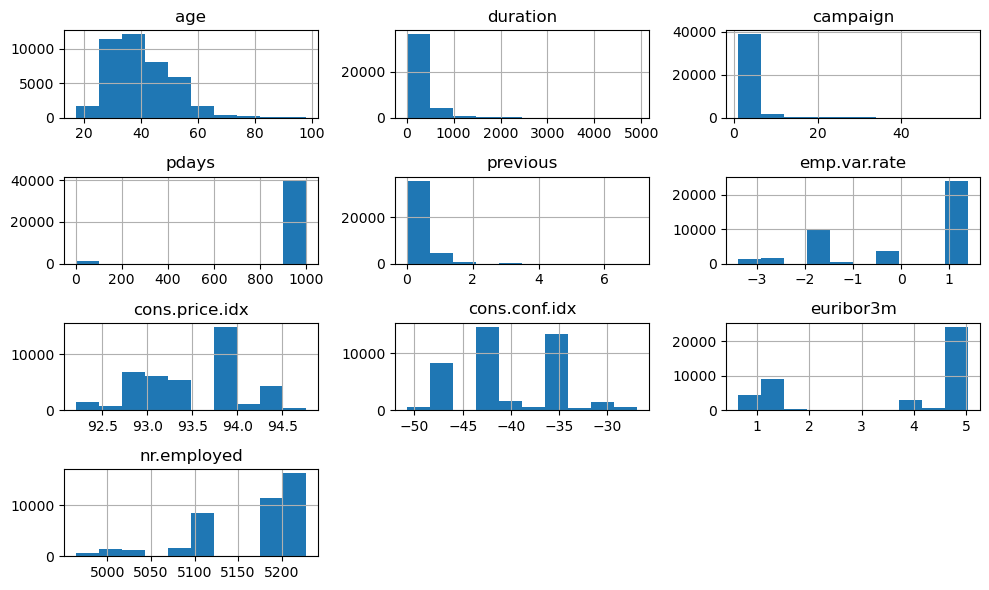

In [9]:
# Data distribution visualizations
data1[NumericalCol].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [10]:
# Calculate skewness for each numerical column
skewness = data1[NumericalCol].skew()

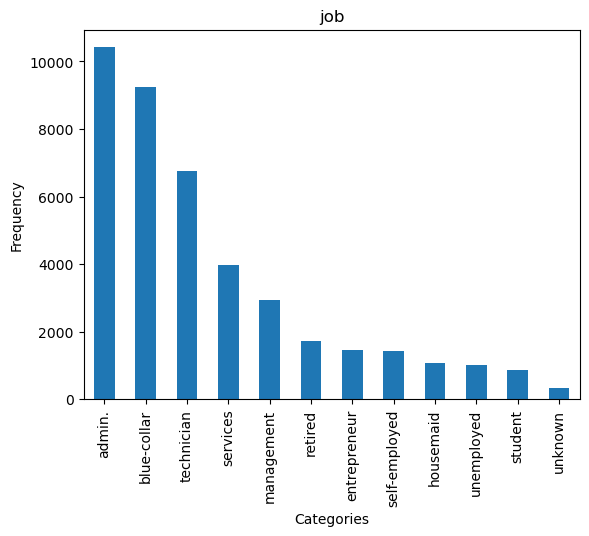

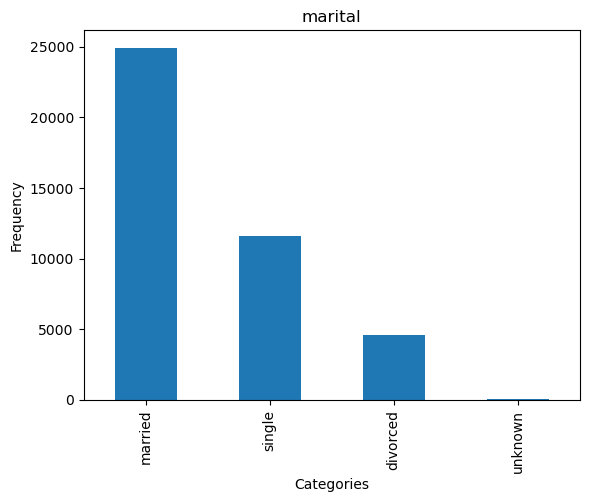

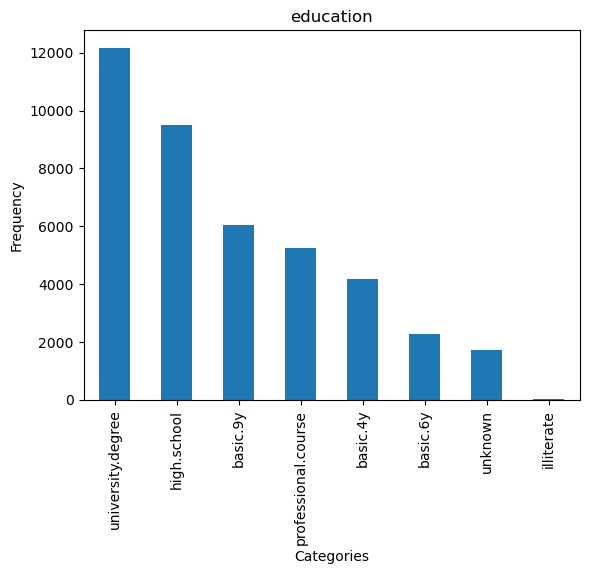

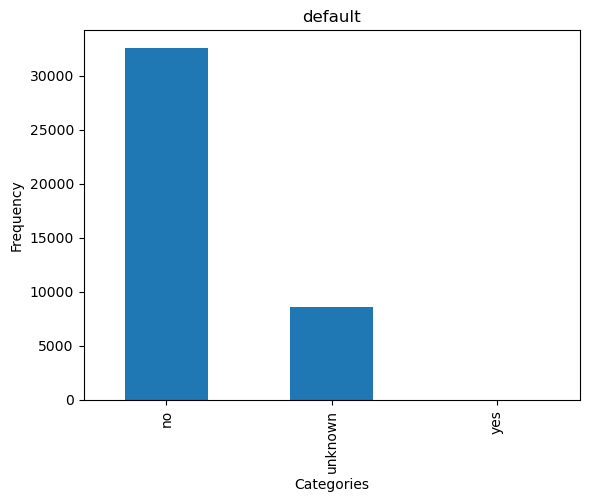

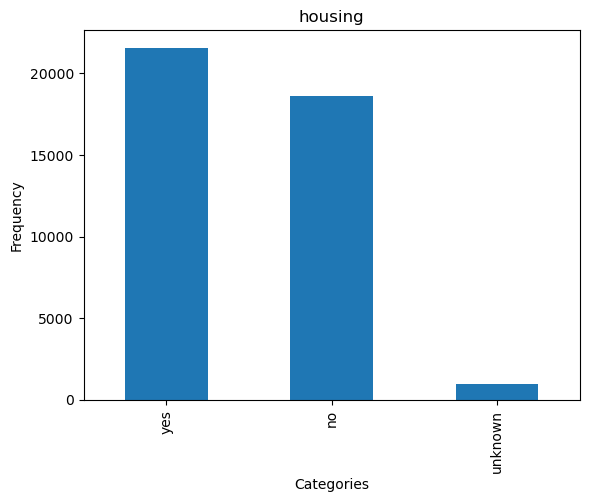

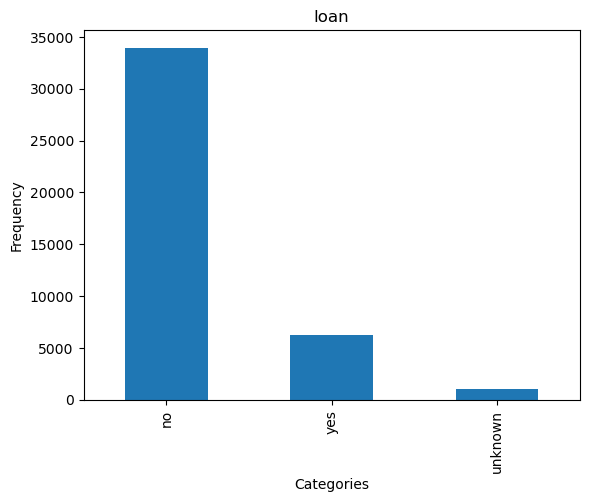

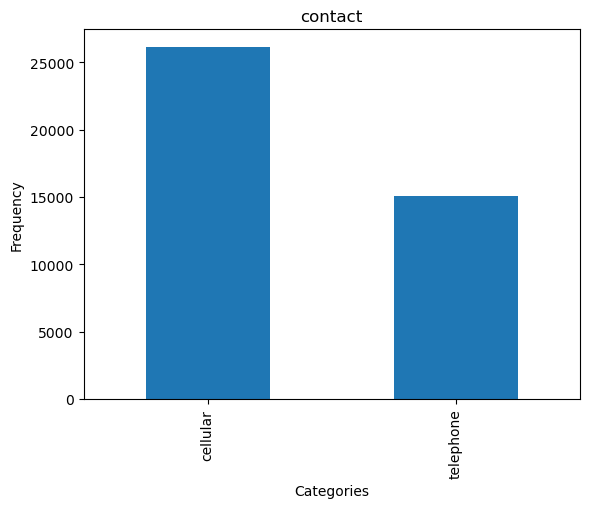

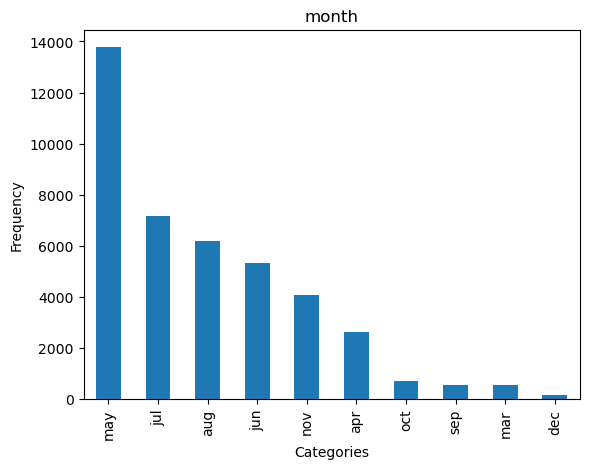

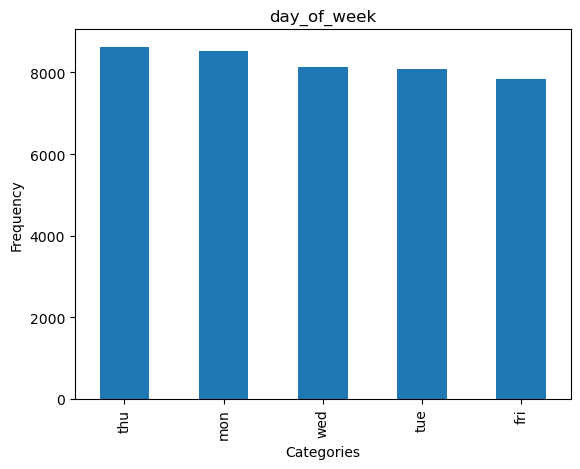

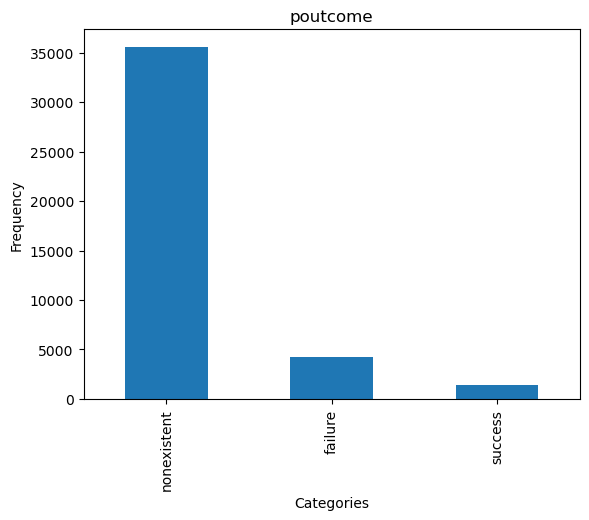

In [11]:
for column in CategoricalCol:
    data1[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

/tmp/ipykernel_6454/385004600.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data1.corr()


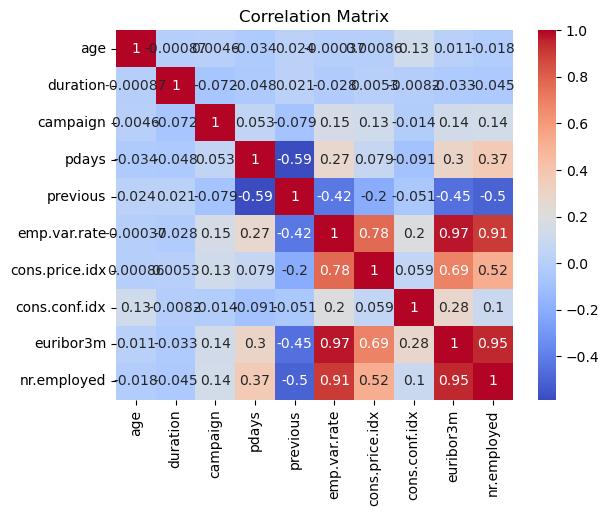

In [12]:
# Calculate the correlation matrix
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Checking if the dataset is balanced:

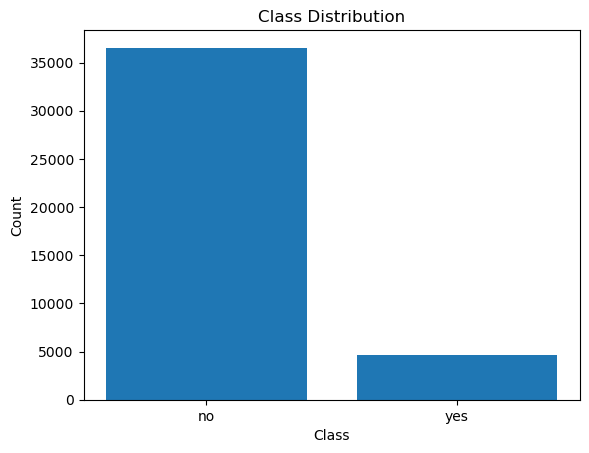

In [13]:
# Count the number of occurrences for each class
class_counts = data1['y'].value_counts()

# Plot the class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Therefore, the data is imbalance.
We will be using SMOTE approach for oversampling the data:

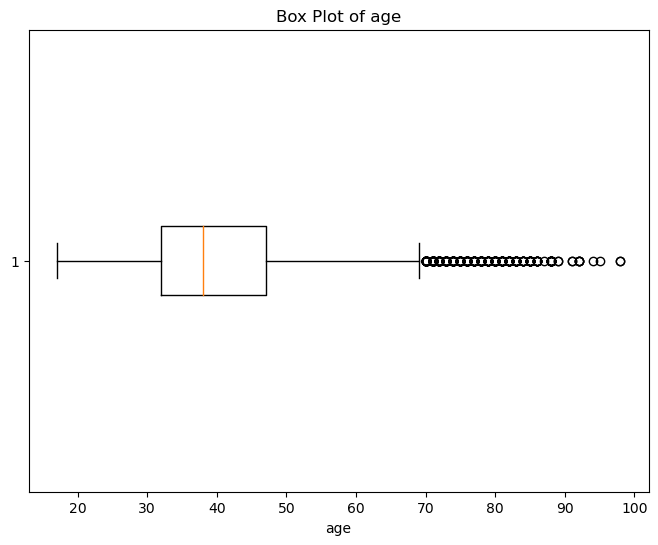

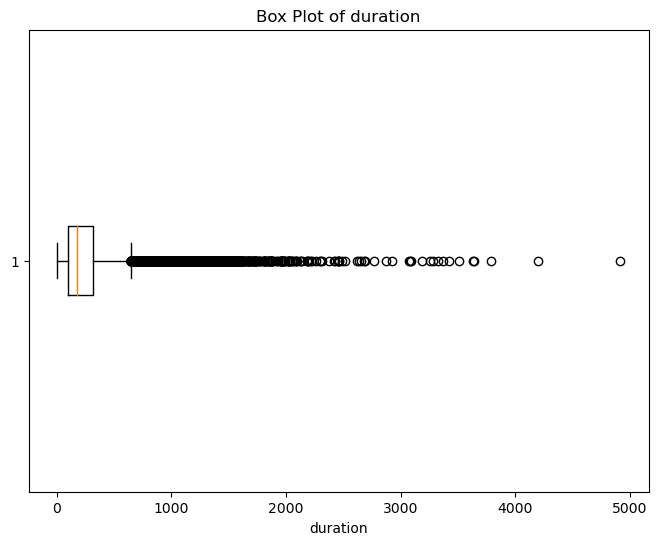

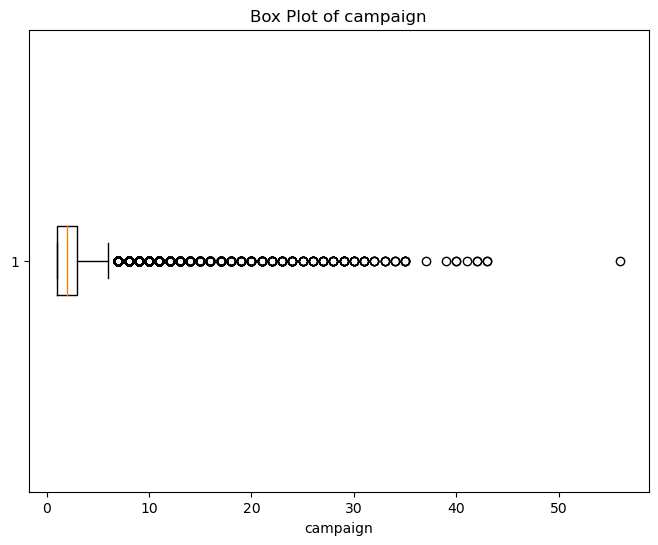

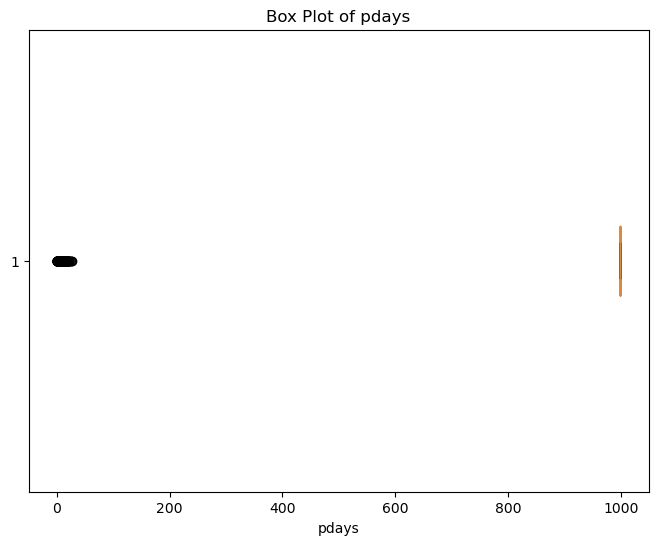

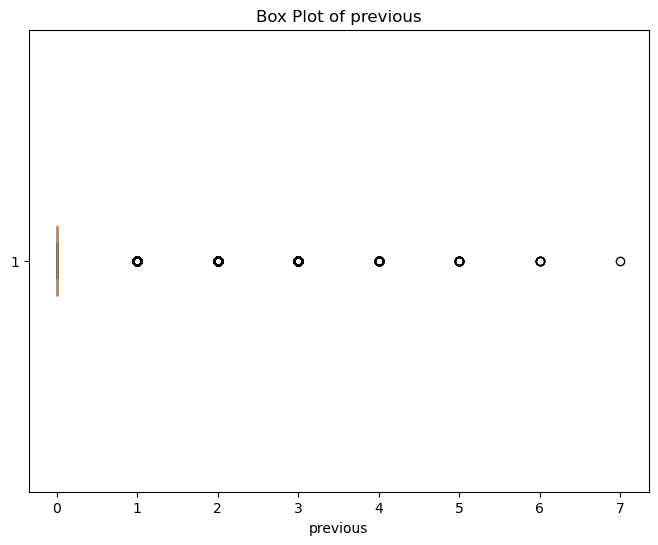

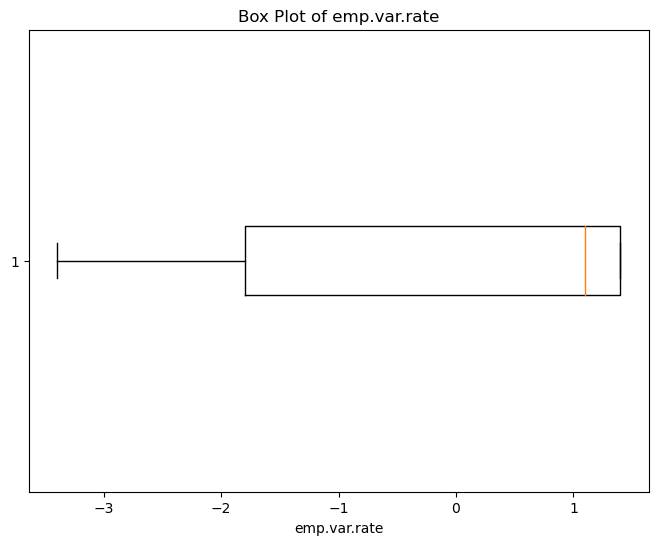

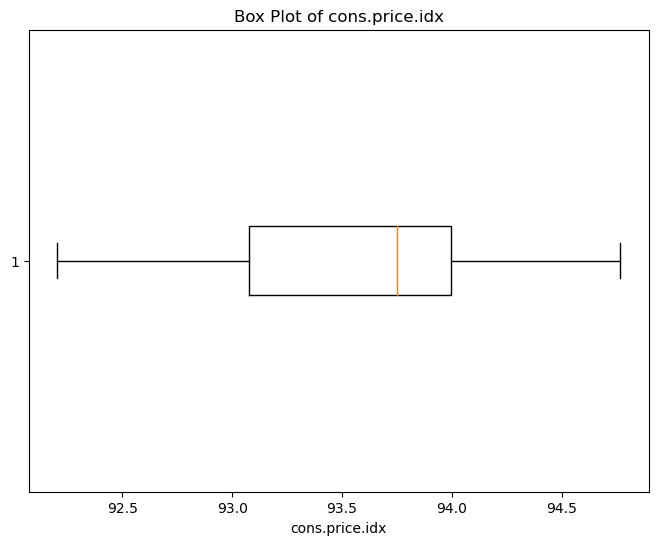

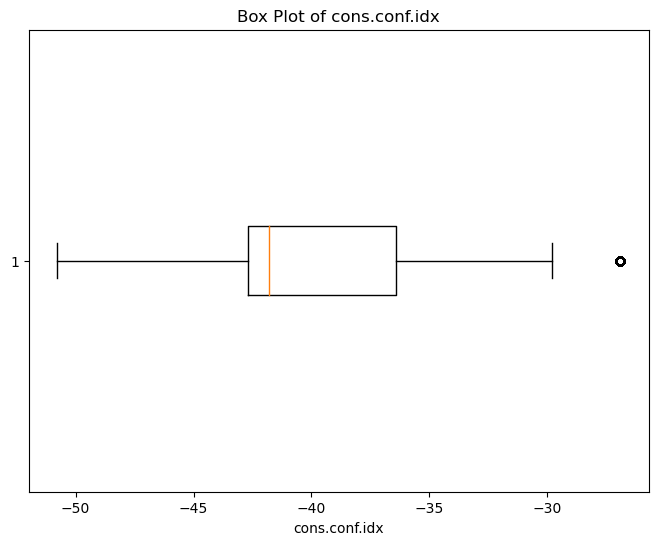

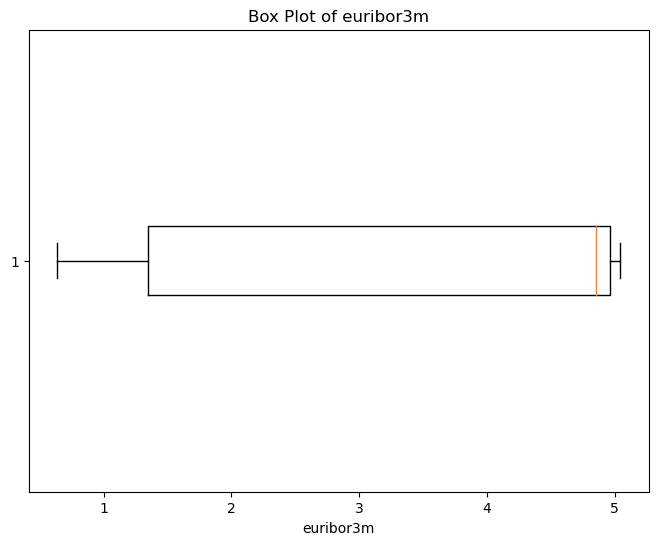

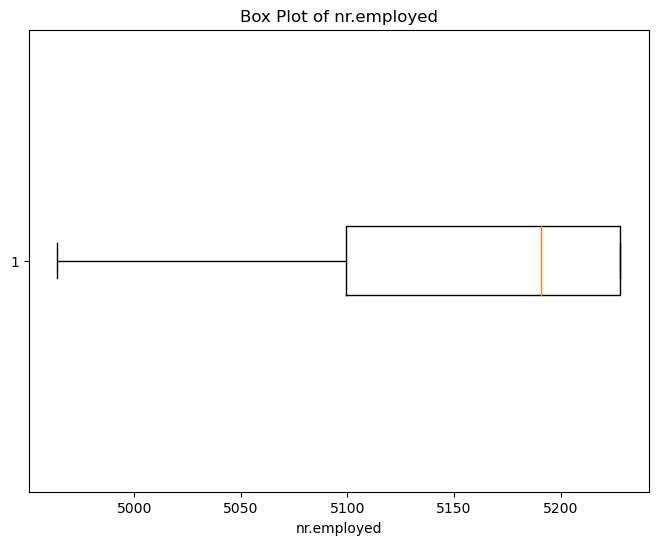

Number of outliers in age : 369
Number of outliers in duration : 861
Number of outliers in campaign : 869
Number of outliers in pdays : 1515
Number of outliers in previous : 1064
Number of outliers in emp.var.rate : 0
Number of outliers in cons.price.idx : 0
Number of outliers in cons.conf.idx : 0
Number of outliers in euribor3m : 0
Number of outliers in nr.employed : 0


In [14]:
# Define the threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Dictionary to store the number of outliers for each feature
outlier_counts1 = {}

# Loop through each numerical column
for column_name in NumericalCol:
    # Calculate the z-scores for the column
    z_scores1 = np.abs((data1[column_name] - data1[column_name].mean()) / data1[column_name].std())

    # Identify outliers
    outliers1 = data1[z_scores1 > threshold]
    
    # Count the number of outliers for the current feature
    num_outliers1 = len(outliers1)

    # Store the number of outliers in the dictionary
    outlier_counts1[column_name] = num_outliers1


    # Generate a box plot to visualize the distribution and potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data1[column_name], vert=False)
    plt.title('Box Plot of ' + column_name)
    plt.xlabel(column_name)
    plt.show()
    
    
# Print the number of outliers for each feature
for column_name, num_outliers1 in outlier_counts1.items():
    print("Number of outliers in", column_name, ":", num_outliers1)

In [15]:
# Extract the features (X) by dropping the target variable column
X = data1.drop("y", axis=1)  

In [16]:
y = data1["y"]

We need to OneHotEncode the data to be able to use SMOTE approach to balance the dataset. 

In [17]:
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [18]:
# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_encoded = encoder.fit_transform(X[categorical_cols])

# Get the column names for the encoded features
encoded_cols = []
for i, col in enumerate(categorical_cols):
    unique_values = X[col].unique()
    for value in unique_values:
        encoded_cols.append(f"{col}_{value}")

# Create a DataFrame with the encoded features
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols)


/home/shivaramezani/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
X_processed = pd.concat([X.select_dtypes(exclude=["object"]), X_encoded], axis=1)

In [20]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Bank-full Dataset

In [21]:
# Load the data from the desired file
data2 = pd.read_csv('bank-full.csv', sep=';')  # Replace with the desired file name

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
data2.shape

(45211, 17)

In [25]:
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
data2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [27]:
NumericalCol2 = ['age', 'duration', 'campaign', 'pdays', 'previous', 'balance', 'day']
CategoricalCol2 = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

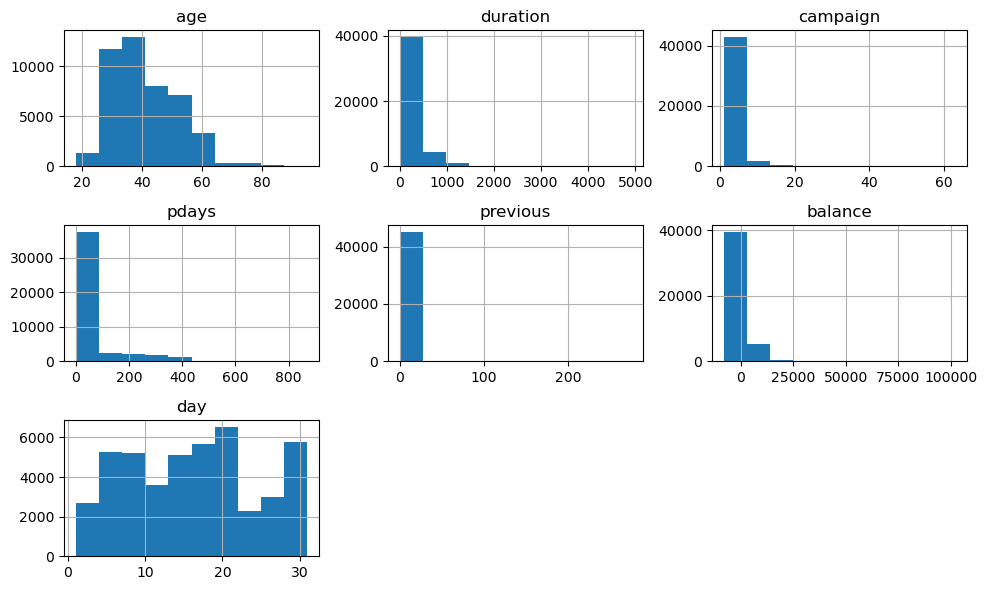

In [28]:
# Data distribution visualizations
data2[NumericalCol2].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

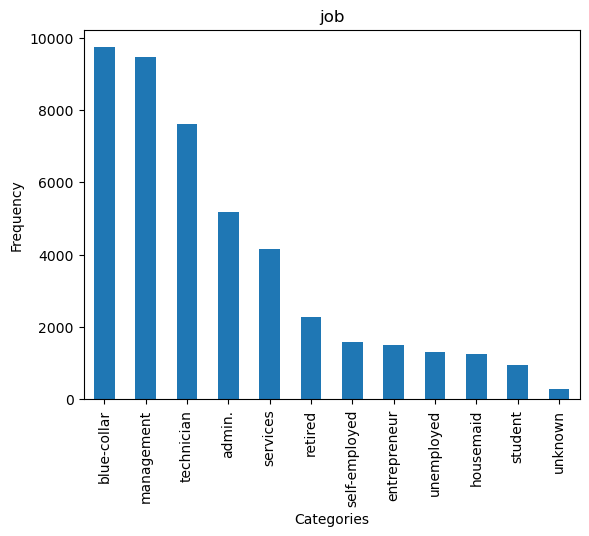

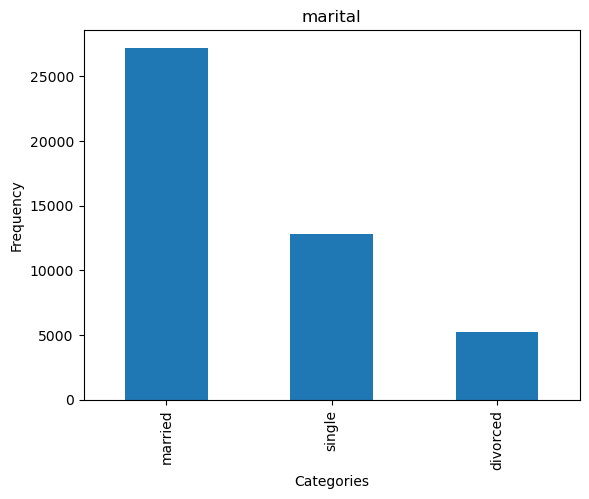

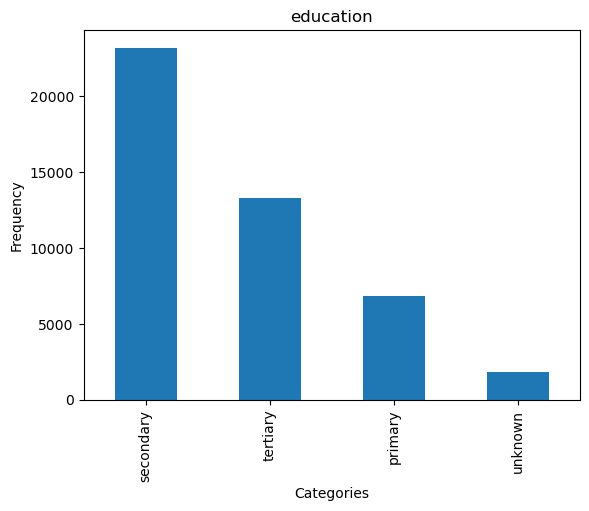

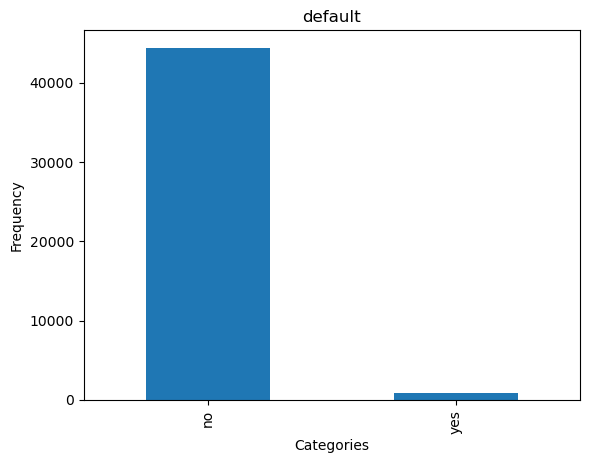

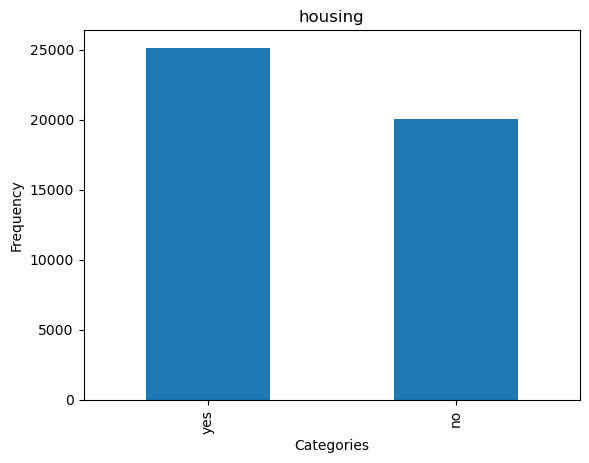

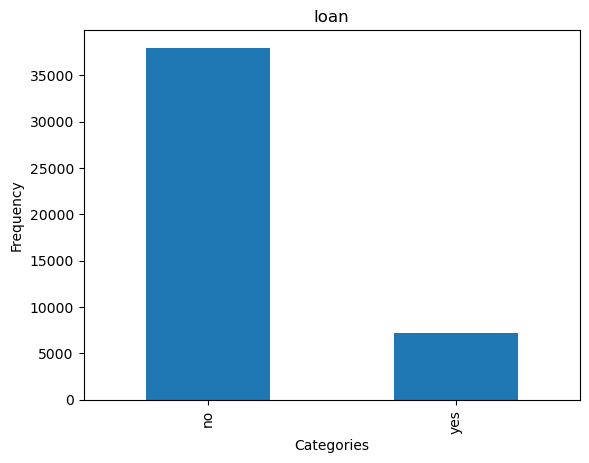

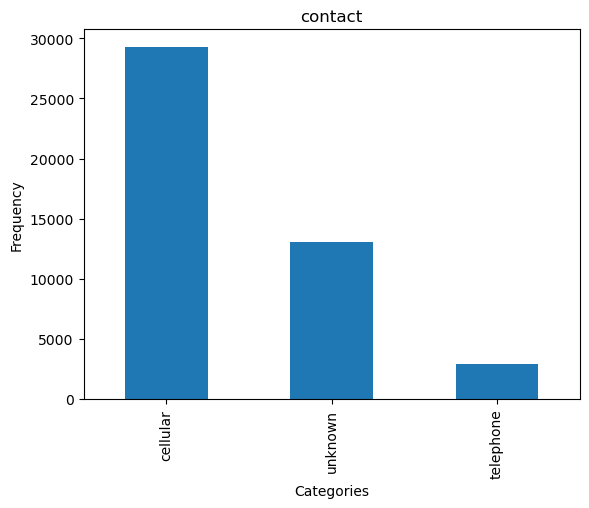

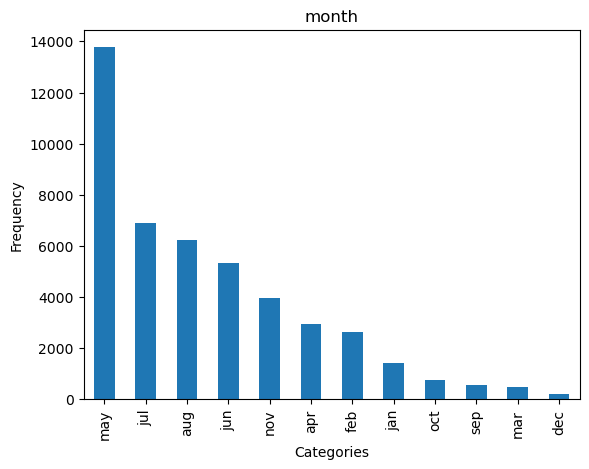

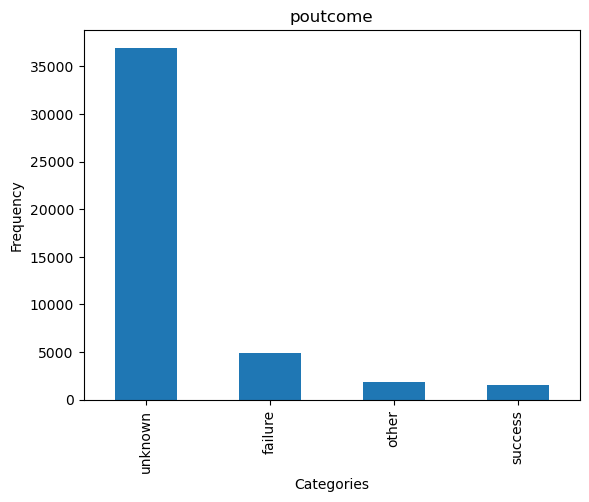

In [29]:
for column in CategoricalCol2:
    data2[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

/tmp/ipykernel_6454/3462527388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix2 = data2.corr()


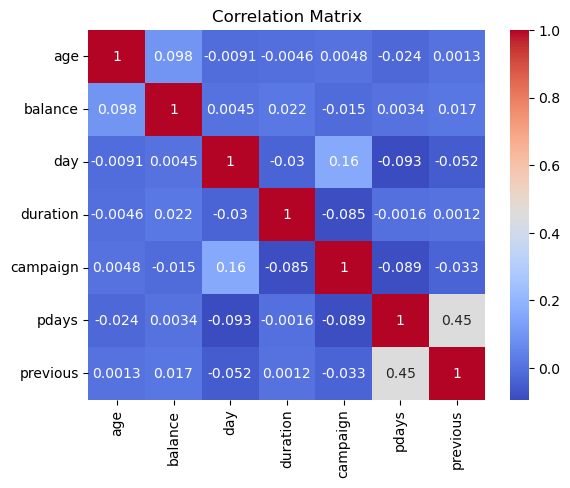

In [30]:
# Calculate the correlation matrix
corr_matrix2 = data2.corr()
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

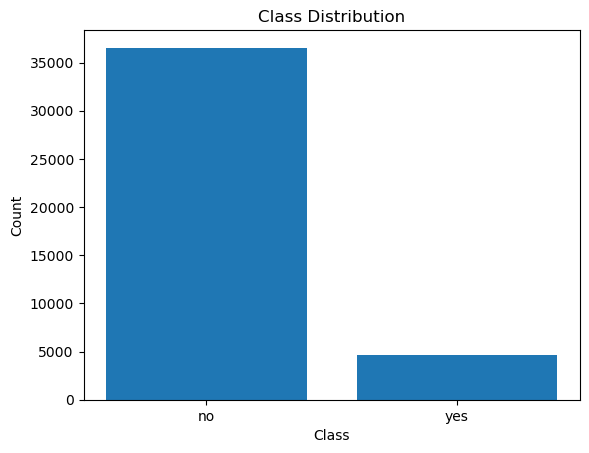

In [31]:
# Count the number of occurrences for each class
class_counts2 = data2['y'].value_counts()

# Plot the class distribution
plt.bar(class_counts2.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Therefore, the dataset is imbalanced.

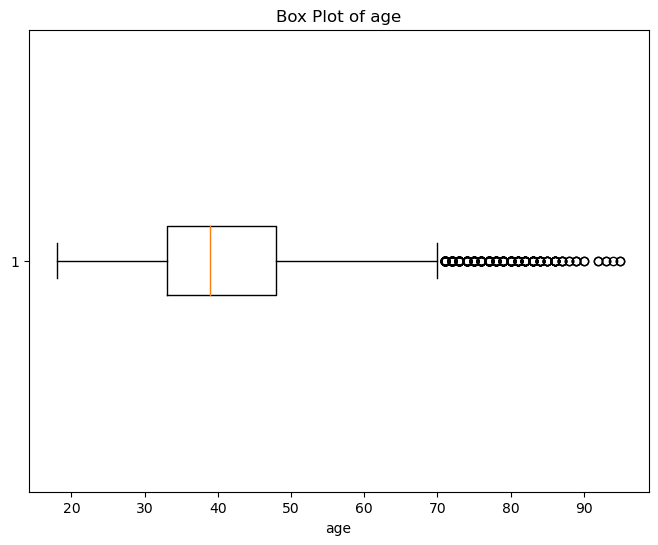

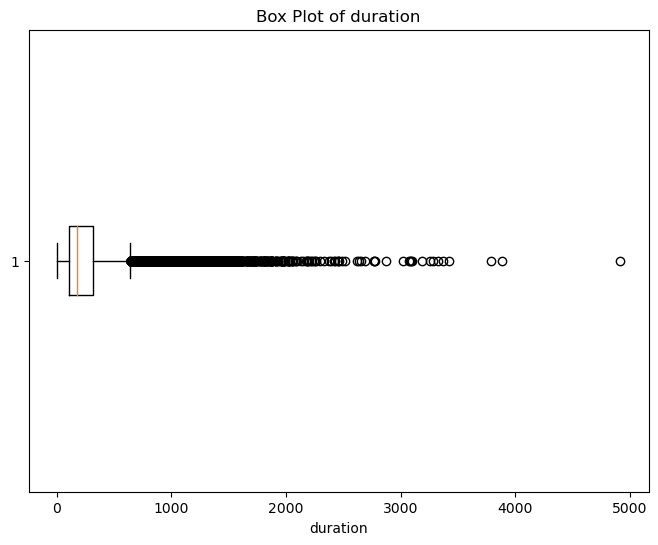

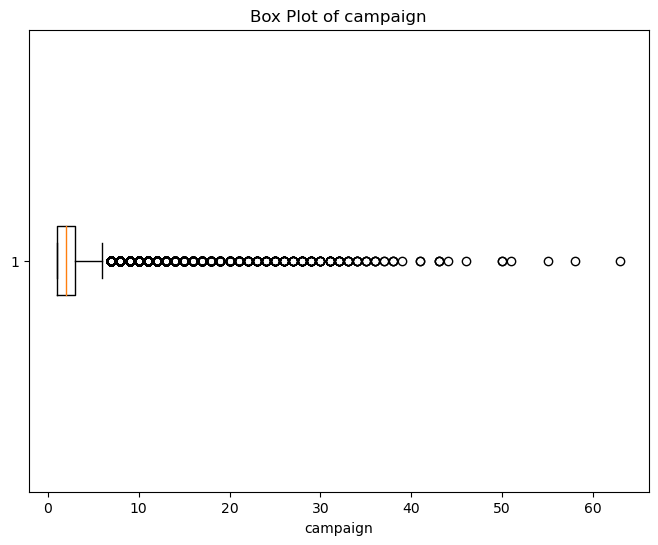

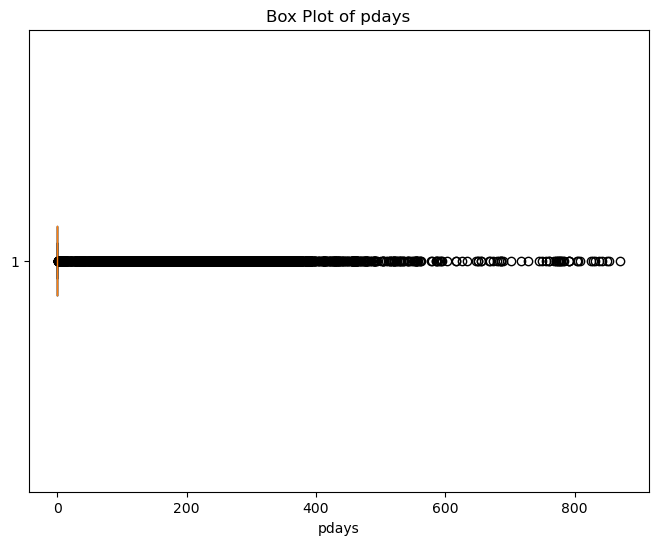

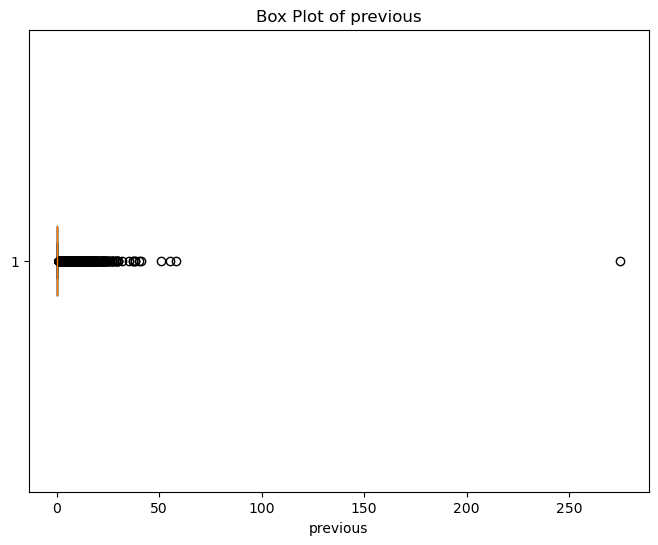

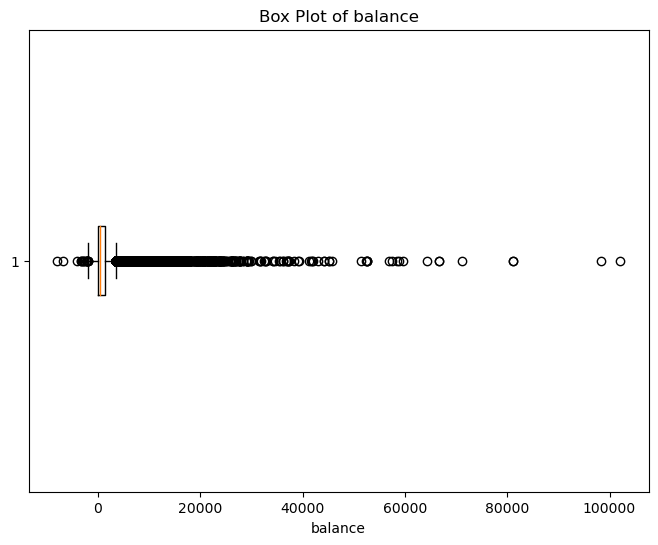

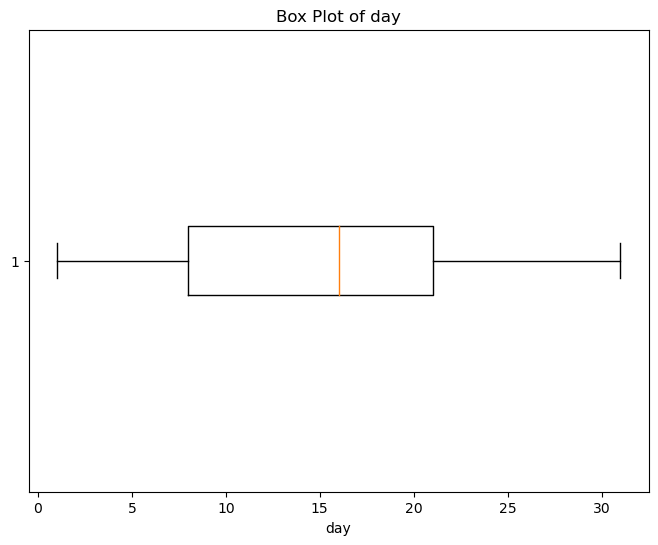

Number of outliers in age : 381
Number of outliers in duration : 963
Number of outliers in campaign : 840
Number of outliers in pdays : 1723
Number of outliers in previous : 582
Number of outliers in balance : 745
Number of outliers in day : 0


In [32]:
# Define the threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Dictionary to store the number of outliers for each feature
outlier_counts2 = {}

# Loop through each numerical column
for column_name in NumericalCol2:
    # Calculate the z-scores for the column
    z_scores2 = np.abs((data2[column_name] - data2[column_name].mean()) / data2[column_name].std())

    # Identify outliers
    outliers2 = data2[z_scores2 > threshold]
    
    # Count the number of outliers for the current feature
    num_outliers2 = len(outliers2)

    # Store the number of outliers in the dictionary
    outlier_counts2[column_name] = num_outliers2


    # Generate a box plot to visualize the distribution and potential outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data2[column_name], vert=False)
    plt.title('Box Plot of ' + column_name)
    plt.xlabel(column_name)
    plt.show()
    
    
# Print the number of outliers for each feature
for column_name, num_outliers2 in outlier_counts2.items():
    print("Number of outliers in", column_name, ":", num_outliers2)

In [33]:
# Extract the features (X) by dropping the target variable column
X2 = data2.drop("y", axis=1)

In [34]:
y2 = data2["y"]

We need to OneHotEncode the data to be able to use SMOTE approach to balance the dataset.

In [35]:
categorical_cols2 = X2.select_dtypes(include=["object"]).columns.tolist()

In [36]:
# Perform one-hot encoding on the categorical columns
encoder2 = OneHotEncoder(sparse=False, handle_unknown="ignore")
X_encoded2 = encoder.fit_transform(X2[categorical_cols2])

# Get the column names for the encoded features
encoded_cols2 = []
for i, col in enumerate(categorical_cols2):
    unique_values2 = X2[col].unique()
    for value in unique_values2:
        encoded_cols2.append(f"{col}_{value}")

# Create a DataFrame with the encoded features
X_encoded2 = pd.DataFrame(X_encoded2, columns=encoded_cols2)

/home/shivaramezani/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
X_processed2 = pd.concat([X2.select_dtypes(exclude=["object"]), X_encoded2], axis=1)

In [38]:
smote = SMOTE()
X_resampled2, y_resampled2 = smote.fit_resample(X_processed2, y2)

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data.drop('y', axis=1)  # Exclude the 'y' column from the input features
y = data['y']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)